<a href="https://colab.research.google.com/github/cauansousa/feature-extraction/blob/main/extra%C3%A7%C3%A3o_de_cores_funcionando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Certifique onde está sendo salvo cada parte do processo, é possível que o nome de algum arquivo tenha que ser colocado manualmente


# Instalaçoes e importações


In [ ]:
#Caso fale para reiniciar - reinicie!
!pip install pandas
!pip install nampy
!pip install matplotlib 
!pip install Pillow
!pip install easydev                 
!pip install colormap                
!pip install opencv-python           
!pip install colorgram.py            
!pip install extcolors 
!pip install webcolors
!sudo apt-get install imagemagick  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement nampy (from versions: none)
ERROR: No matching distribution found for nampy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 2.6 MB/s 
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=f1da6befc5dc6840c2917ba9d396537e95a3ce275ce0b669eac12db4dde50bef
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built easydev
Looking in indexes: htt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk popp

In [ ]:
#Importar tudo que precisa para o código funcionar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
from PIL import Image, ImageFile
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import cv2
import extcolors
import webcolors
import os
from colormap import rgb2hex
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from skimage.transform import resize

!git clone https://github.com/shreyas-bk/U-2-Net
!git clone https://github.com/cauansousa/feature-extraction

Cloning into 'U-2-Net'...
remote: Enumerating objects: 520, done.
remote: Total 520 (delta 0), reused 0 (delta 0), pack-reused 520
Receiving objects: 100% (520/520), 12.39 MiB | 26.09 MiB/s, done.
Resolving deltas: 100% (236/236), done.
Cloning into 'cv2pose'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [ ]:
#Se conectar ao google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Salvar imagens na pasta /content/color
!mkdir /content/U-2-Net/images
!mkdir /content/U-2-Net/results
!mkdir /content/U-2-Net/mask
#!cp -R /content/drive/MyDrive/Color/* /content/U-2-Net/images

# Criação de máscara e retirar o fundo

In [ ]:
# Dar resize nas imagens #Definir caminho
%cd /content/U-2-Net/images
!mogrify -resize 640X480 *.jpg #Se precisar, trocar extensão da imagem! - Recomendado: PNG e JPEG

/content/U-2-Net/images


In [ ]:
#Renomeando a imagem
%cd /content/U-2-Net/images/
!x=1; for i in *; do mv -v "$i" "$x-image.jpg"; x=$((x+1)); done # renomeia as images no diretorio especificado

/content/U-2-Net/images
renamed 'img.jpg' -> '1-image.jpg'


/content/U-2-Net
['/content/U-2-Net/images/1-image.jpg']
inferencing: 1-image.jpg


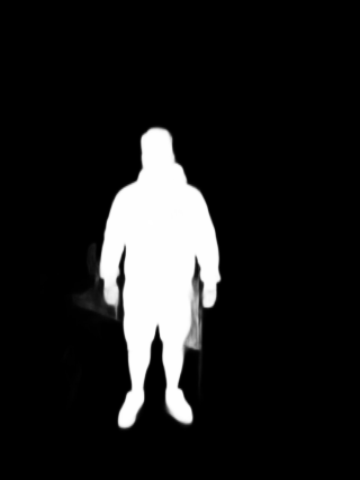

In [ ]:
# run the test script, and outputs are saved to mask folder
%cd /content/U-2-Net
!python -W ignore u2net_test.py

result_image_path = '/content/U-2-Net/mask/1-image.png'
output = load_img(result_image_path)
display(output)

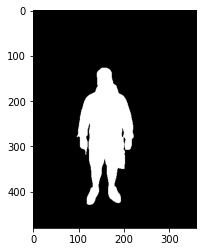

In [ ]:
# convert output to numpy array and rescale(255 for RBG images)
RESCALE = 255
out_img = img_to_array(output)
out_img /= RESCALE

# define the cutoff threshold below which, background will be removed.
THRESHOLD = 0.2

# refine the output
out_img[out_img > THRESHOLD] = 1
out_img[out_img <= THRESHOLD] = 0
plt.imshow(out_img)

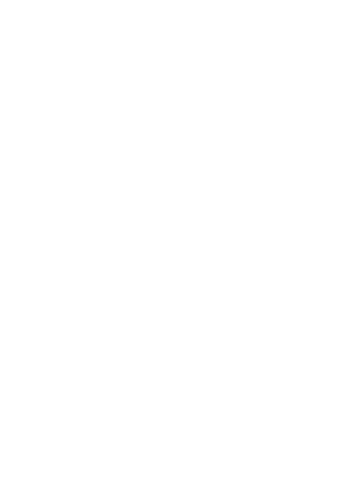

In [ ]:
# convert the rbg image to an rgba image and set the zero values to transparent
shape = out_img.shape
a_layer_init = np.ones(shape = (shape[0],shape[1],1))
mul_layer = np.expand_dims(out_img[:,:,0],axis=2)
a_layer = mul_layer*a_layer_init
rgba_out = np.append(out_img,a_layer,axis=2)
display(Image.fromarray((rgba_out*RESCALE).astype('uint8'), 'RGBA'))

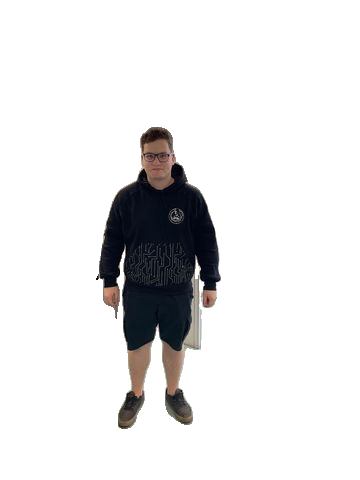

In [ ]:
# load and convert input to numpy array and rescale(255 for RBG images)
original_image_path = '/content/U-2-Net/images/1-image.jpg'
original_image = load_img(original_image_path)
inp_img = img_to_array(original_image)
inp_img /= RESCALE
# since the output image is rgba, convert this also to rgba, but with no transparency
a_layer = np.ones(shape = (shape[0],shape[1],1))
rgba_inp = np.append(inp_img,a_layer,axis=2)
# simply multiply the 2 rgba images to remove the backgound
rem_back = (rgba_inp*rgba_out)
rem_back_scaled = Image.fromarray((rem_back*RESCALE).astype('uint8'), 'RGBA')
display(rem_back_scaled)
# save the resulting image to colab
rem_back_scaled.save('/content/U-2-Net/results/image_background_removed.png')

# cvPose e crop de imagens

In [ ]:
%rm -rf /content/U-2-Net/images/*

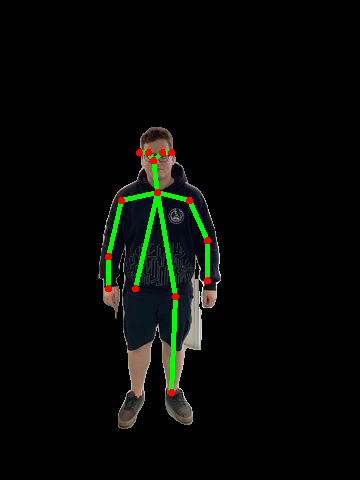

In [ ]:
import argparse
import json
from google.colab.patches import cv2_imshow

BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

inWidth = 640
inHeight = 480

net = cv2.dnn.readNetFromTensorflow("/content/cv2pose/graph_opt.pb")

cap = cv2.imread('/content/U-2-Net/results/image_background_removed.png')

while cv2.waitKey(1) < 0:
    frame = cap

    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    
    net.setInput(cv2.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]  # MobileNet output [1, 57, -1, -1], we only need the first 19 elements

    assert(len(BODY_PARTS) == out.shape[1])

    points = []
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponging body's part.
        heatMap = out[0, i, :, :]

        # Originally, we try to find all the local maximums. To simplify a sample
        # we just find a global one. However only a single pose at the same time
        # could be detected this way.
        _, conf, _, point = cv2.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]
        # Add a point if it's confidence is higher than threshold.
        points.append((int(x), int(y)) if conf > 0.2 else None)

    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv2.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv2.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv2.FILLED)
            cv2.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv2.FILLED)

    t, _ = net.getPerfProfile()
    freq = cv2.getTickFrequency() / 1000
    cv2.putText(frame, '%.2fms' % (t / freq), (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))


    cv2_imshow(frame) 
    break

with open("/content/U-2-Net/points.json", "w") as f:
    json.dump(points,f)

#para rodar com imagem 'python detect.py --input imagem.jpg'
#para rodar com webcam 'python detect.py'
#para aumentar o treshold 'python detect.py --input image.jpg --thr 0.5'

In [ ]:
modelo = cv2.imread('/content/U-2-Net/results/image_background_removed.png')

null = 'null'

with open('/content/U-2-Net/points.json', 'r') as f:
  point = json.load(f)

i = 0
for pontos in point:
    if pontos == 'null':
        continue
    if i == 1:
        neck = pontos[1] 
    if i == 8:
        cint = pontos[1] + 25
    if i == 15:
        eye = pontos[1] - 25
    i += 1

cv2.imwrite('/content/U-2-Net/images/torso.png', modelo[neck - 25:cint, 0:])
cv2.imwrite('/content/U-2-Net/images/pernas.png', modelo[cint - 25:, 0:])
cv2.imwrite('/content/U-2-Net/images/cabeca.png', modelo[:neck - 10])


True


# Refazer a mascara para cortar o fundo!

In [ ]:
#Renomeando a imagem e limpando dir mask
%rm -rf /content/U-2-Net/mask/*
%cd /content/U-2-Net/images/
!x=1; for i in *; do mv -v "$i" "$x-image.png"; x=$((x+1)); done # renomeia as images no diretorio especificado

/content/U-2-Net/images
mv: cannot stat '19': No such file or directory
mv: cannot stat '19': No such file or directory
mv: cannot stat '19': No such file or directory


/content/U-2-Net
['/content/U-2-Net/images/pernas.png', '/content/U-2-Net/images/cabeca.png', '/content/U-2-Net/images/torso.png']
inferencing: pernas.png
inferencing: cabeca.png
inferencing: torso.png


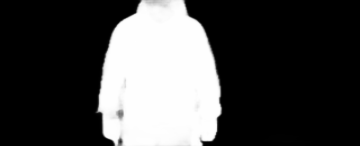

In [ ]:
# run the test script, and outputs are saved to mask folder
%cd /content/U-2-Net
!python -W ignore u2net_test.py

result_image_path = '/content/U-2-Net/mask/torso.png'
output = load_img(result_image_path)
display(output)

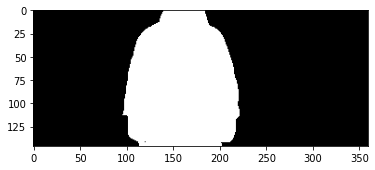

In [ ]:
# convert output to numpy array and rescale(255 for RBG images)
RESCALE = 255
out_img = img_to_array(output)
out_img /= RESCALE

# define the cutoff threshold below which, background will be removed.
THRESHOLD = 0.2

# refine the output
out_img[out_img > THRESHOLD] = 1
out_img[out_img <= THRESHOLD] = 0
plt.imshow(out_img)

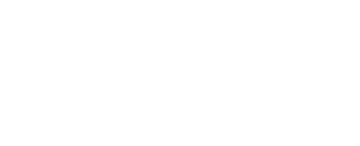

In [ ]:
# convert the rbg image to an rgba image and set the zero values to transparent
shape = out_img.shape
a_layer_init = np.ones(shape = (shape[0],shape[1],1))
mul_layer = np.expand_dims(out_img[:,:,0],axis=2)
a_layer = mul_layer*a_layer_init
rgba_out = np.append(out_img,a_layer,axis=2)
display(Image.fromarray((rgba_out*RESCALE).astype('uint8'), 'RGBA'))

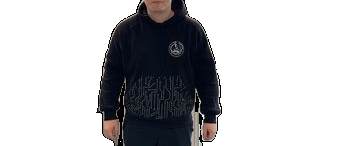

In [ ]:
# load and convert input to numpy array and rescale(255 for RBG images)
original_image_path = '/content/U-2-Net/images/torso.png'#TROCAR NOME DA IMG
original_image = load_img(original_image_path)
inp_img = img_to_array(original_image)
inp_img /= RESCALE
# since the output image is rgba, convert this also to rgba, but with no transparency
a_layer = np.ones(shape = (shape[0],shape[1],1))
rgba_inp = np.append(inp_img,a_layer,axis=2)
# simply multiply the 2 rgba images to remove the backgound
rem_back = (rgba_inp*rgba_out)
rem_back_scaled = Image.fromarray((rem_back*RESCALE).astype('uint8'), 'RGBA')
display(rem_back_scaled)
# save the resulting image to colab
rem_back_scaled.save('/content/U-2-Net/results/image_background_removed.png')

# Pegar cor predominante

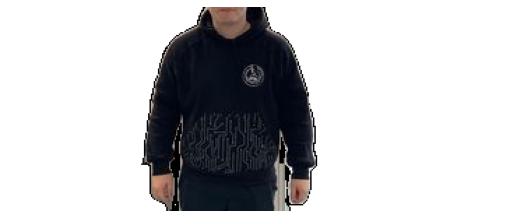

In [ ]:
ImageFile.LOAD_TRUNCATED_IMAGES = True #Permitir que imagens corrompidas sejam usadas
segm_image = '/content/U-2-Net/results/image_background_removed.png' #Caminho da imagem
#Mostrar imagem
plt.figure(figsize=(9, 9))
img = plt.imread(segm_image)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
#A função extcolors.extract_from_path() pega as cores (RGB) que possuem a maior frequência e coloca em uma matriz
colors_x = extcolors.extract_from_path(segm_image, tolerance = 12, limit = 12)
rgb = (colors_x[0][0][0])


if rgb == (255, 255, 255):
    print('white')
if rgb == (0, 0, 0):
    print('black')
elif rgb[0] == rgb[1] and rgb[1] == rgb[2] and rgb[0] == rgb[2]:
    print('grey')  

elif rgb[0] > rgb[1] and rgb[0] > rgb[2]:
    if rgb[0] > 209 and rgb[1] > 179 and rgb[2] > 134 and rgb != (255,192,203):
        print('bege')
    elif (rgb == (184, 134, 11) or rgb == (189,83,107) or rgb == (139,69,19) or rgb == (160,82,45) or rgb == (188,143,143)) or rgb[0] > 204 and rgb[1] > 104 and rgb[2] < 144:
        print('brown')
    elif rgb[0] > 204 and rgb[1] < 193 and rgb[2] > 91:
        print('rosa')
    elif rgb == (255,140,0) or rgb == (255,165,0):
        print('Orange')
    elif rgb == (255,215,0):
        print('gold')
    elif rgb == (189,83,107):
        print('green')
    else:
        print('red')

elif rgb[1] > rgb[0] and rgb[1] > rgb[2] or rgb == (47,79,79):
    print('green')

elif rgb[2] > rgb[1] and rgb[2] > rgb[0] or rgb == (0,255,255) or rgb == (0,139,139) or rgb == (0,128,128):
    if rgb[0] > 122 and rgb[1] < 113 and rgb[2] > 203 or rgb == (128,0,128) or rgb == (75,0,130):
        print('purple')
    else:
        print('blue')

elif rgb == (128,128,0):
    print('green')
elif rgb == (255,255,0):
    print('Yellow')
elif rgb == (255,0,255) or rgb == (238,130,238) or rgb == (218,112,214) or rgb == (221,160,221):
    print('rosa')



black


In [ ]:
#Imprimir tabela com as cores em HEX
def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

df_color = color_to_df(colors_x)
df_color

,c_code,occurence
0,#000000,10518
1,#111924,1862
2,#86695B,763
3,#2E323B,592
4,#897F7D,372
5,#C7BCB8,335
6,#4D4D55,202
7,#B47B68,142
8,#DEDFE1,44
9,#634A43,39


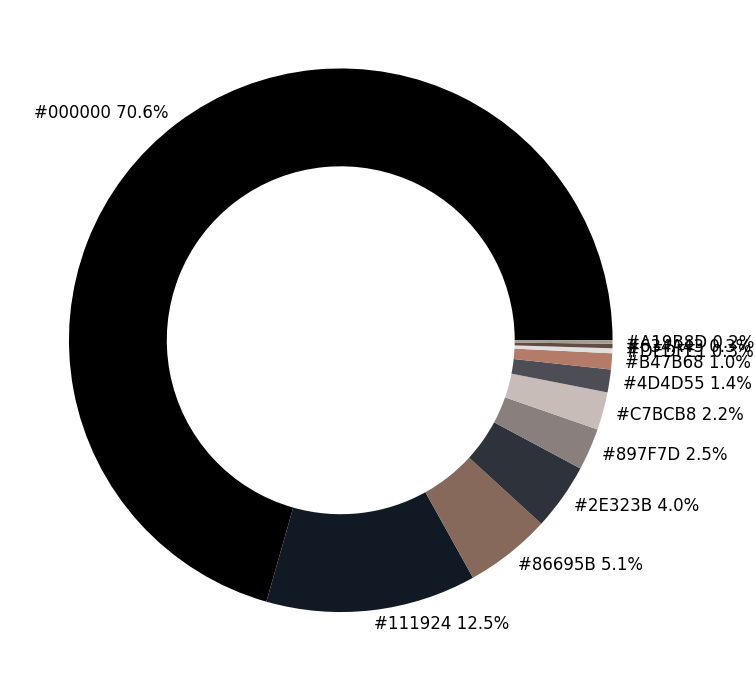

In [ ]:
#Imprimir gráfico com as porcentagens das cores
list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                               list_precent)]
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'}
                     )
plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()

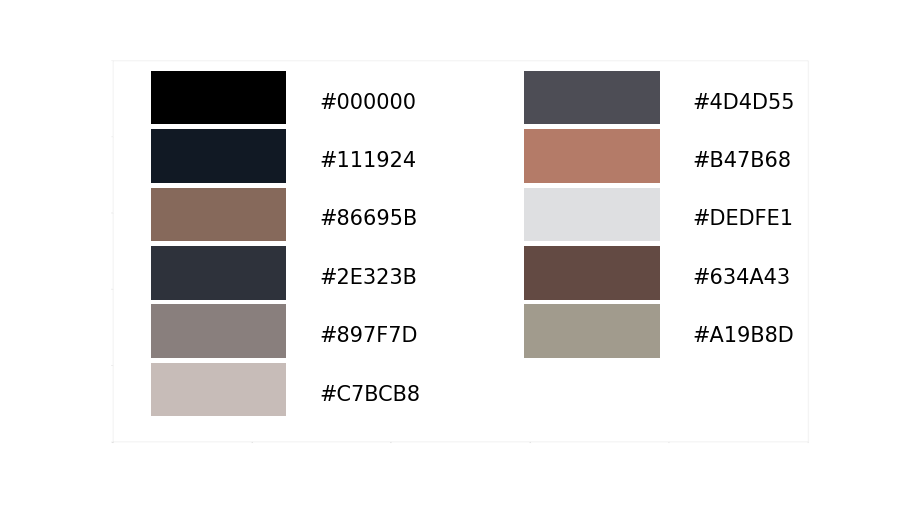

In [ ]:
#Criar tabela com as cores em si!

#create background color
fig, ax = plt.subplots(figsize=(192,108),dpi=10)
fig.set_facecolor('white')
plt.savefig('bg.png')
plt.close(fig)

#create color palette
bg = plt.imread('bg.png')
fig = plt.figure(figsize=(90, 90), dpi = 10)
ax = fig.add_subplot(1,1,1)

x_posi, y_posi, y_posi2 = 320, 25, 25
for c in list_color:
    if  list_color.index(c) <= 5:
        y_posi += 125
        rect = patches.Rectangle((x_posi, y_posi), 290, 115, facecolor = c)
        ax.add_patch(rect)
        ax.text(x = x_posi+360, y = y_posi+80, s = c, fontdict={'fontsize': 150})
    else:
        y_posi2 += 125
        rect = patches.Rectangle((x_posi + 800, y_posi2), 290, 115, facecolor = c)
        ax.add_artist(rect)
        ax.text(x = x_posi+1160, y = y_posi2+80, s = c, fontdict={'fontsize': 150})
        
ax.axis('off')
plt.imshow(bg)
plt.tight_layout()

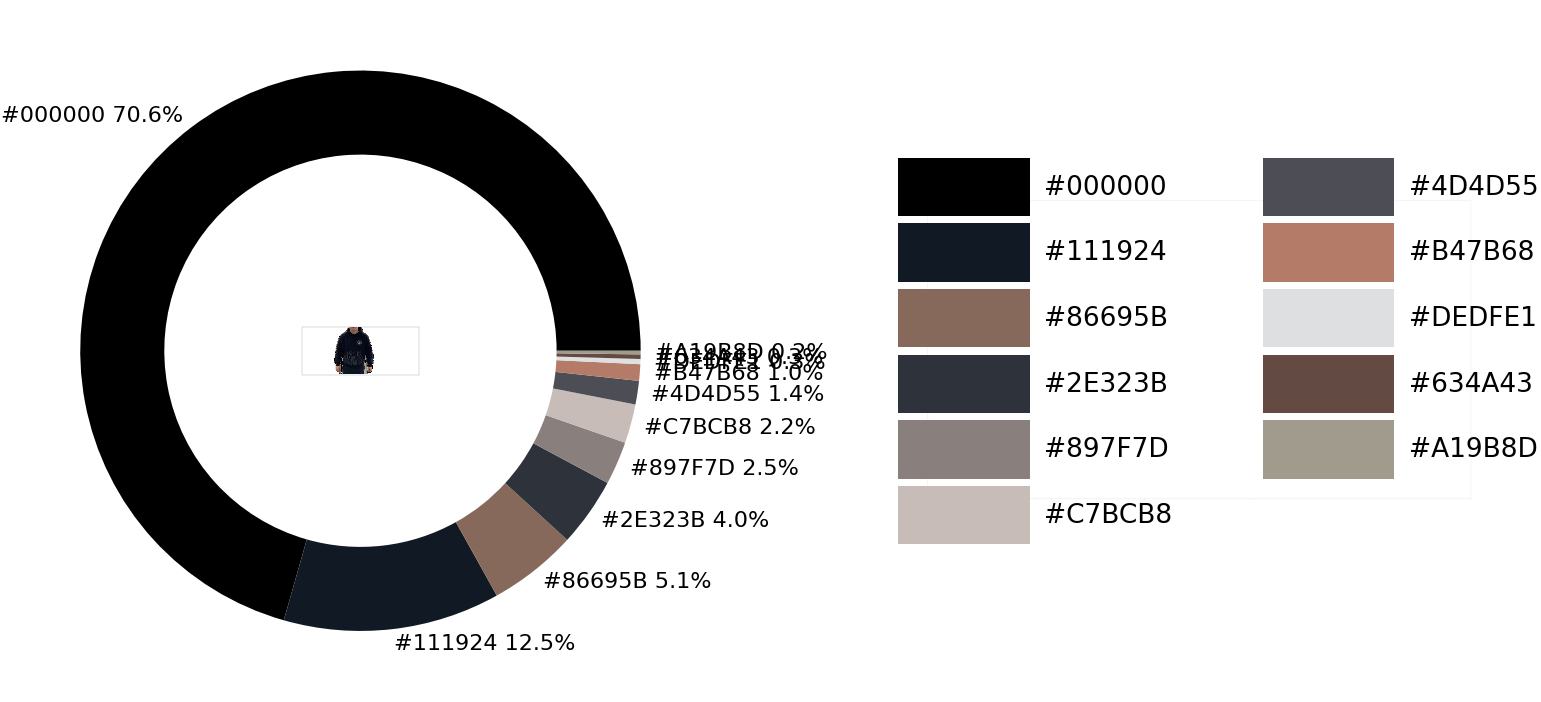

In [ ]:
img = mpimg.imread(segm_image)
bg = plt.imread('bg.png')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(160,120), dpi = 10)

#donut plot
wedges, text = ax1.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 160, 'color':'black'})
plt.setp(wedges, width=0.3)

#add image in the center of donut plot
imagebox = OffsetImage(img, zoom=2.3)
ab = AnnotationBbox(imagebox, (0, 0))
ax1.add_artist(ab)

#color palette
x_posi, y_posi, y_posi2 = 160, -170, -170
for c in list_color:
    if list_color.index(c) <= 5:
        y_posi += 180
        rect = patches.Rectangle((x_posi, y_posi), 360, 160, facecolor = c)
        ax2.add_patch(rect)
        ax2.text(x = x_posi+400, y = y_posi+100, s = c, fontdict={'fontsize': 190})
    else:
        y_posi2 += 180
        rect = patches.Rectangle((x_posi + 1000, y_posi2), 360, 160, facecolor = c)
        ax2.add_artist(rect)
        ax2.text(x = x_posi+1400, y = y_posi2+100, s = c, fontdict={'fontsize': 190})

ax2.axis('off')
fig.set_facecolor('white')
plt.imshow(bg)       
plt.tight_layout()